# Benchmarks Schwarzschild Black Hole (cartesian coordinates)

<ul id="top">
    <li><a href="#Loading-packages-and-functions">Loading packages and functions</a></li>
    <li><a href="#Initial-value-problem:-Schwarzschild-black-hole">Initial-value-problem:-Schwarzschild-black-hole</a></li> 
    <li><a href="#IRKGL16-integrations">IRKGL16 integrations</a></li>
    <li><a href="#Splitting-integrations">Splitting integrations</a></li>
    <li><a href="#Benchmarks-diagrams">Benchmarks diagrams</a></li>
    <ul>
        <li><a href="#Work-precison-diagrams">Work-precison diagrams</a></li>
        <li><a href="#Error-in-Energy">Error in Energy</a></li>
        <li><a href="#Error-in-Solution">Error in Solution</a></li>
    </ul>
</ul>

## Loading packages and functions

In [1]:
using LinearAlgebra
using Plots


PATH_IRKGL="../../../../IRKGaussLegendre.jl-master/IRKGaussLegendre.jl-master/"
include(string(PATH_IRKGL,"src/IRKGaussLegendre.jl"))
using .IRKGaussLegendre  ## bertsio lokala exekutatzeko  

PATH_Splitting="../../"
include(string(PATH_Splitting,"/src/SplittingMethods.jl"))
using .SplittingMethods  ## bertsio lokala exekutatzeko  

include("../Aux_functions.jl")

lcm_floats_vector (generic function with 1 method)

##### <a href="#top">Back to the top</a>

## Initial value problem: Schwarzschild black-hole

In [2]:
include(string(PATH_IRKGL,"ODEProblems/InitialSchwarzschild.jl"))
include(string(PATH_IRKGL,"ODEProblems/SchwarzschildBH.jl"))

u0, parms = InitialSchwarzschild()

t0=0.
tF=1e5  #1e4
tspan=(t0,tF);

<a href="#top">Back to the top</a>

## IRKGL16 integrations

In [3]:
prob = ODEProblem{true,SciMLBase.FullSpecialize}(SchwarzschildODE!, u0, tspan , parms)

HAM=Ham_Schwarzschild
@show(HAM(u0,parms));

HAM(u0, parms) = -0.5


,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0

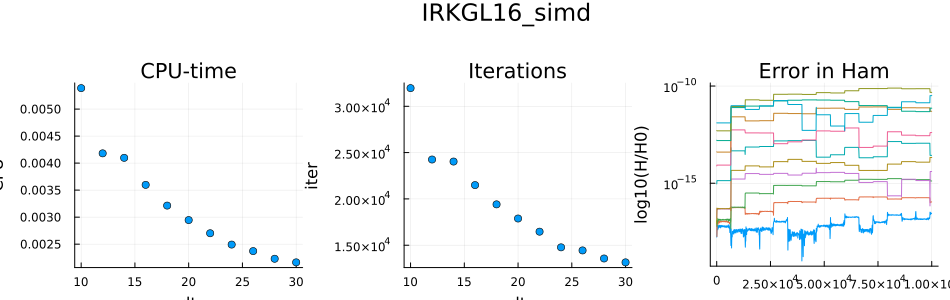

,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0

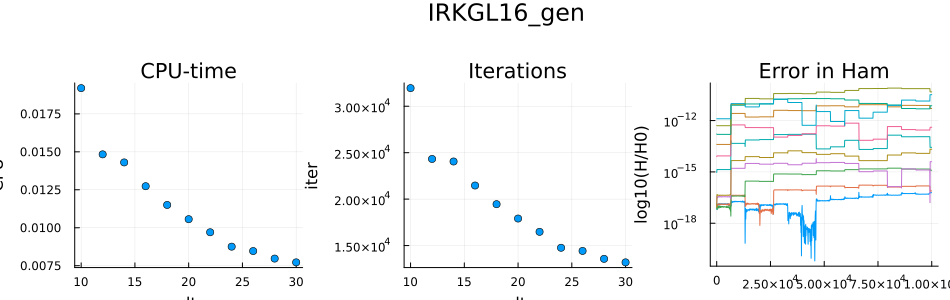

In [4]:
ddt0_irk16=collect(10.:2:30)
nruns=100

alg=IRKGL16(simd=true)
sols_irk16_simd=run_many_IRKGL16(alg, prob, ddt0_irk16, HAM, nruns=nruns)
fig=plots_IRKGL16("IRKGL16_simd",prob,HAM,sols_irk16_simd)
display(fig)
#
alg=IRKGL16(simd=false)
sols_irk16_gen=run_many_IRKGL16(alg,prob,ddt0_irk16,HAM, nruns=nruns)
fig=plots_IRKGL16("IRKGL16_gen",prob,HAM,sols_irk16_gen)
display(fig)

In [5]:
[sols_irk16_simd.dts sols_irk16_simd.retcodes sols_irk16_simd.iters sols_irk16_simd.cpus sols_irk16_simd.MaxΔHlocal]

11×5 Matrix{Float64}:
 10.0  1.0  31959.0  0.00538764  5.44085e-17
 12.0  1.0  24252.0  0.00418081  7.08366e-17
 14.0  1.0  24032.0  0.00409782  5.53662e-16
 16.0  1.0  21490.0  0.00359742  4.12305e-15
 18.0  1.0  19410.0  0.00321373  9.74447e-15
 20.0  1.0  17882.0  0.00294578  1.90714e-13
 22.0  1.0  16461.0  0.00270198  6.63036e-13
 24.0  1.0  14769.0  0.00249217  3.23866e-12
 26.0  1.0  14437.0  0.00237153  7.62524e-12
 28.0  1.0  13566.0  0.00222973  2.58407e-11
 30.0  1.0  13147.0  0.00216294  2.14799e-11

In [6]:
[sols_irk16_gen.dts sols_irk16_gen.retcodes sols_irk16_gen.iters sols_irk16_gen.cpus sols_irk16_gen.MaxΔHlocal]

11×5 Matrix{Float64}:
 10.0  1.0  31952.0  0.0191946   5.54182e-17
 12.0  1.0  24327.0  0.0148338   5.71171e-17
 14.0  1.0  24053.0  0.0143021   5.61405e-16
 16.0  1.0  21467.0  0.0127352   4.10797e-15
 18.0  1.0  19456.0  0.0115009   9.75213e-15
 20.0  1.0  17910.0  0.0105635   1.9067e-13
 22.0  1.0  16479.0  0.00970195  6.63042e-13
 24.0  1.0  14763.0  0.00875344  3.2387e-12
 26.0  1.0  14423.0  0.00846462  7.62525e-12
 28.0  1.0  13571.0  0.00796839  2.58407e-11
 30.0  1.0  13191.0  0.00771927  2.148e-11

In [7]:
log(sols_irk16_simd.MaxΔHlocal[4]/sols_irk16_simd.MaxΔHlocal[8])/log(sols_irk16_simd.cpus[8]/sols_irk16_simd.cpus[4])

18.16121589073017

In [8]:
log(sols_irk16_simd.MaxΔHlocal[4]/sols_irk16_simd.MaxΔHlocal[8])/log(ddt0_irk16[4]/ddt0_irk16[8])

16.441175095105475

<a href="#top">Back to the top</a>

## Splitting integrations

In [9]:
include(string(PATH_Splitting,"ODEProblems/InitialSchwarzschildv2.jl"))
include(string(PATH_Splitting,"ODEProblems/SchwarzschildBHv2.jl"))

u0v2, parmsv2 = InitialSchwarzschildv2()
HAMV2=Ham_Schwarzschildv2

flows=[flowH1Schwarzschild!, flowH2Schwarzschild!, flowH3Schwarzschild!]
prob=SplittingProblem(flows, u0v2, tspan, parmsv2);

@show HAMV2(u0v2,parmsv2)

HAMV2(u0v2, parmsv2) = -0.5


-0.5

### Composition methods

In [10]:
ddt0_split=collect(0.5:0.25:5)
nruns=100

s=1; r=2
alg=Splitting_alg(r=r, rkn=false)
sols_split_r2=run_many_Splitting(s, alg, prob, ddt0_split, HAMV2, nruns=nruns)
#fig=plots_Splitting("Split r=2", alg, prob, HAMV2, sols_split_r2)
#display(fig)
#
s=5; r=4
alg=Splitting_alg(r=r, rkn=false)
sols_split_r4=run_many_Splitting(s, alg, prob, s*ddt0_split, HAMV2, nruns=nruns)
#
s=13; r=6
alg=Splitting_alg(r=r, rkn=false)
sols_split_r6=run_many_Splitting(s, alg, prob, s*ddt0_split, HAMV2, nruns=nruns)
#
s=21; r=8
alg=Splitting_alg(r=r, rkn=false)
sols_split_r8=run_many_Splitting(s, alg, prob, s*ddt0_split, HAMV2, nruns=nruns)
#
s=35; r=10
alg=Splitting_alg(r=r, rkn=false)
sols_split_r10=run_many_Splitting(s, alg, prob, s*ddt0_split, HAMV2, nruns=nruns);

,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,2.5,3.75,5.0,6.25,7.5,8.75,10.0,11.25,12.5,13.75,15.0,16.25,17.5,18.75,20.0,21.25,22.5,23.75,25.0,6.5,9.75,13.0,16.25,19.5,22.75,26.0,29.25,32.5,35.75,39.0,42.25,45.5,48.75,52.0,55.25,58.5,61.75,65.0,10.5,15.75,21.0,26.25,31.5,36.75,42.0,47.25,52.5,57.75,63.0,68.25,73.5,78.75,84.0,89.25,94.5,99.75,105.0,17.5,26.25,35.0,43.75,52.5,61.25,70.0,78.75,87.5,96.25,105.0,113.75,122.5,131.25,140.0,148.75,157.5,166.25,175.0

In [11]:
[sols_split_r2.MaxΔHlocal sols_split_r4.MaxΔHlocal sols_split_r6.MaxΔHlocal sols_split_r8.MaxΔHlocal sols_split_r10.MaxΔHlocal] 

19×5 Matrix{Float64}:
 1.56152e-7   2.09048e-8   6.10109e-9       2.77416e-9      2.71707e-9
 5.27058e-7   1.56947e-7   9.73661e-8       9.11773e-8      3.94287e-7
 1.24832e-6   6.60741e-7   5.83146e-7       6.28987e-7      3.49021e-6
 2.43536e-6   2.00476e-6   3.28803e-6       6.15133e-6      3.83621e-5
 4.19908e-6   4.40285e-6   1.11601e-5       3.09664e-5      0.000193565
 6.69016e-6   9.6589e-6    2.96414e-5       0.000104794     0.00022932
 9.97831e-6   1.97317e-5   6.1829e-5        0.000242639     0.00143289
 1.42087e-5   3.6536e-5    0.000153804      0.000707012     0.00237853
 1.94308e-5   5.93525e-5   0.000241718      0.00100995      0.00487531
 2.59492e-5   6.33444e-5   0.000461258      0.0021962       0.00402389
 3.36248e-5   0.000135963  0.00064591       0.00567752      0.00372463
 4.20191e-5   0.000187801  0.00133471       0.00581734      0.0107091
 5.34291e-5   0.000208566  0.00184859       0.00463089      0.0111828
 6.39019e-5   0.000398499  0.00206628       0.401234    

<a href="#top">Back to the top</a>

## Benchmarks diagrams

### Work-precison diagrams

In [12]:
[ddt0_irk16 sols_irk16_simd.MaxΔHlocal  sols_irk16_simd.cpus]

11×3 Matrix{Float64}:
 10.0  5.44085e-17  0.00538764
 12.0  7.08366e-17  0.00418081
 14.0  5.53662e-16  0.00409782
 16.0  4.12305e-15  0.00359742
 18.0  9.74447e-15  0.00321373
 20.0  1.90714e-13  0.00294578
 22.0  6.63036e-13  0.00270198
 24.0  3.23866e-12  0.00249217
 26.0  7.62524e-12  0.00237153
 28.0  2.58407e-11  0.00222973
 30.0  2.14799e-11  0.00216294

In [13]:
s=5
[s*ddt0_split  sols_split_r4.MaxΔHlocal  sols_split_r4.cpus ]

19×3 Matrix{Float64}:
  2.5   2.09048e-8   0.0159964
  3.75  1.56947e-7   0.0106652
  5.0   6.60741e-7   0.00800302
  6.25  2.00476e-6   0.00640197
  7.5   4.40285e-6   0.00533486
  8.75  9.6589e-6    0.0045728
 10.0   1.97317e-5   0.00402269
 11.25  3.6536e-5    0.00355846
 12.5   5.93525e-5   0.00320214
 13.75  6.33444e-5   0.00291436
 15.0   0.000135963  0.00267181
 16.25  0.000187801  0.0024651
 17.5   0.000208566  0.00229115
 18.75  0.000398499  0.00213712
 20.0   0.000554213  0.00200327
 21.25  0.000647667  0.00188557
 22.5   0.000886192  0.00178115
 23.75  0.00105562   0.00169453
 25.0   0.00132611   0.0016163

In [14]:
sols2plot=[sols_irk16_simd, sols_irk16_gen,
           sols_split_r2, sols_split_r4, sols_split_r6, sols_split_r8, sols_split_r10]

labels2plot=["IRKGL16(simd)", "IRKGL16(gen)", 
              "Strang(r=2)", "SUZ90(r=4)", "SS05(r=6)", "SS05(r=8)", "SS05(r=10)"] 

colors2plot=[:red, :blue, :green, :orange, :purple, :cyan, :magenta];

In [15]:
index0=4   # IRKGL16: h=16, index0=4 (exact solution)
idx=10     # IRKGL16: index1=10 optimum step-size

index=[idx]
compute_index_ge_cpu!(index, sols_irk16_simd.cpus[idx], sols2plot[2:end])

for i in 1:length(index)
    
    k=index[i]
    println(k, " , ", labels2plot[i], " , ", sols2plot[i].dts[k], " , ", sols2plot[i].cpus[k])
    
end


10 , IRKGL16(simd) , 28.0 , 0.0022297325199999987
11 , IRKGL16(gen) , 30.0 , 0.007719270619999997
16 , Strang(r=2) , 4.25 , 0.0023113168399999996
13 , SUZ90(r=4) , 17.5 , 0.00229114828
12 , SS05(r=6) , 42.25 , 0.0023938021599999994
12 , SS05(r=8) , 68.25 , 0.0023802861299999996
12 , SS05(r=10) , 113.75 , 0.0023734171400000004


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


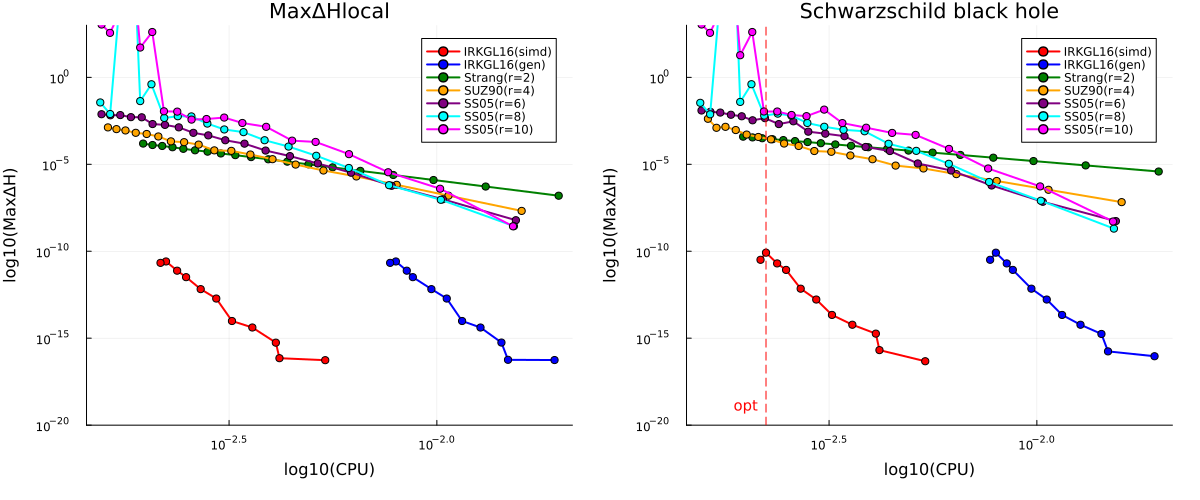

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [30]:
yrange=(1e-20, 1e3)

xrange=(1,50)

sols=sols_irk16_simd
pl1=plot( sols.cpus , sols.MaxΔHlocal, scale=:log10,
          markershape=:circle, lw=2,
          ylimits=yrange, 
          label=labels2plot[1], color=colors2plot[1],
          title="MaxΔHlocal", xlabel="log10(CPU)", ylabel="log10(MaxΔH)")

for i in 2:length(sols2plot)
    
    sols=sols2plot[i]
    
    plot!(pl1, sols.cpus , sols.MaxΔHlocal, 
          markershape=:circle, lw=2,
         label=labels2plot[i], color=colors2plot[i],
         scale=:log10)
    
end

#########################################

sols=sols_irk16_simd
pl2=plot( sols.cpus , sols.MaxΔHglobal, scale=:log10,
         markershape=:circle, lw=2,
         ylimits=yrange, 
         label=labels2plot[1], color=colors2plot[1],
         title="Schwarzschild black hole", xlabel="log10(CPU)", ylabel="log10(MaxΔH)")


for i in 2:length(sols2plot)
    
    sols=sols2plot[i]
    
    plot!(pl2, sols.cpus , sols.MaxΔHglobal, 
          markershape=:circle, lw=2,
          label=labels2plot[i], color=colors2plot[i],
          scale=:log10)

end

vline!(pl2, [sols_irk16_simd.cpus[index[1]]], line=:dash, label="", color=:red)
annotate!((sols_irk16_simd.cpus[index[1]]+0.12, 0.05), text("opt", :red, 10, :center))


plot(pl1, pl2, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


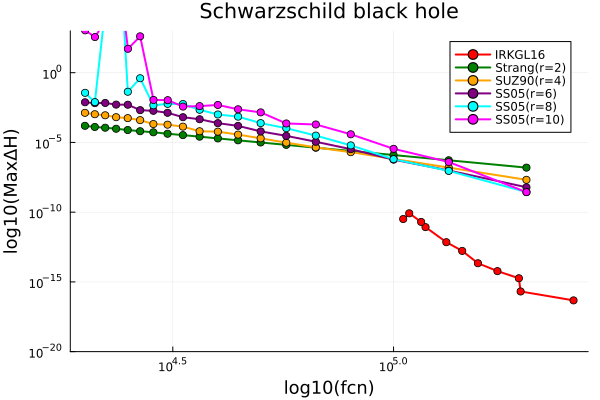

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [31]:
yrange=(1e-20, 1e3)
xrange=(1,50)

fcn=8*(sols_irk16_simd.iters)

sols=sols_irk16_simd
pl3=plot( fcn , sols.MaxΔHglobal, scale=:log10,
         markershape=:circle, lw=2,
         ylimits=yrange,    
         label="IRKGL16", color=colors2plot[1],
         title="Schwarzschild black hole", 
         xlabel="log10(fcn)", ylabel="log10(MaxΔH)",
         guidefont=font(12), labelsize=10)


for i in 3:length(sols2plot)
       
   sols=sols2plot[i]
    
   if occursin("rkn", labels2plot[i])
       plot!(pl3, sols.nflowsH3 , sols.MaxΔHlocal, 
       markershape=:xcross, lw=2, ls=:dash,
       label=labels2plot[i], color=colors2plot[i],
       scale=:log10)
        
   else 
       plot!(pl3, sols.nflowsH3 , sols.MaxΔHlocal, 
             markershape=:circle, lw=2,
             label=labels2plot[i], color=colors2plot[i],
             scale=:log10)
   end

end

display(pl3)

In [18]:
typeof(pl3)

In [19]:
savefig("./figures/Fig1a.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Schwarzschild black hole/figures/Fig1a.pdf"

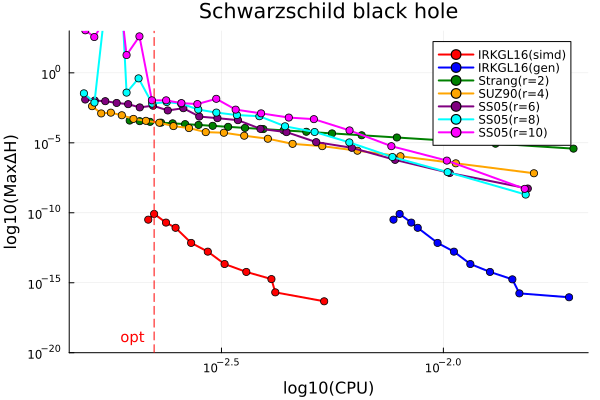

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [20]:
plot(pl2)

In [21]:
savefig("./figures/Fig1b.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Schwarzschild black hole/figures/Fig1b.pdf"

<a href="#top">Back to the top</a>

### Error in Energy

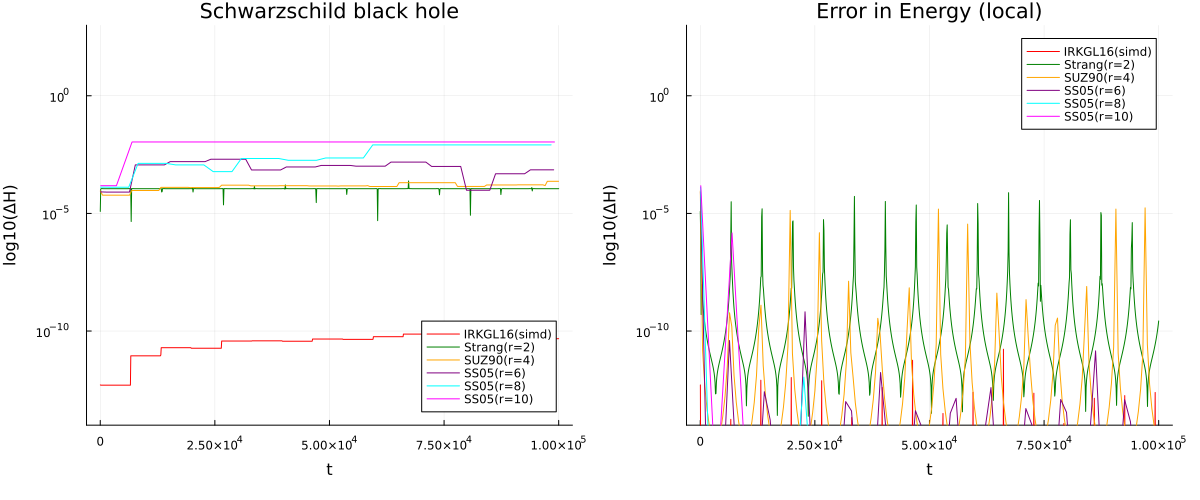

In [22]:
yrange=(1e-14, 1e3)


onesols2plot=[sols_irk16_simd.sols[index[1]], sols_split_r2.sols[index[3]], sols_split_r4.sols[index[4]],
              sols_split_r6.sols[index[5]],   sols_split_r8.sols[index[6]], sols_split_r10.sols[index[7]]]


H0=HAM(BigFloat.(u0),BigFloat.(parms))

H = [HAM(BigFloat.(u),BigFloat.(parms)) for u in sols_irk16_simd.sols[index[1]].u]
ΔH0 = @. Float64(abs(H/H0-1))
ΔH0loc = @. Float64(abs((H[2:end] / H[1:end-1]) - 1))

m0 = max(1,div(Int64(ceil((tF-t0)/ddt0_irk16[index[1]])),1000))

pl3=plot(sols_irk16_simd.sols[index[1]].t[2:m0:end], abs.(ΔH0[2:m0:end]),
        ylimits=yrange,
        xlabel="t", ylabel="log10(ΔH)",title="Schwarzschild black hole",
        label=labels2plot[1],color=colors2plot[1],
        yscale=:log10, legend=:bottomright)

pl4=plot(sols_irk16_simd.sols[index[1]].t[2:m0:end], abs.(ΔH0loc[1:m0:end]),
        ylimits=yrange,
        xlabel="t", ylabel="log10(ΔH)",title="Error in Energy (local)",
        label=labels2plot[1],color=colors2plot[1],
        yscale=:log10)

# splitting

H0=HAMV2(BigFloat.(u0v2),BigFloat.(parmsv2))
for k in 2:length(onesols2plot)
    m0 = max(1,div(Int64(ceil((tF-t0)/ddt0_split[index[k+1]])),1000))
    solk=onesols2plot[k]
    labelk=labels2plot[k+1]
    colork=colors2plot[k+1]
    H = [HAMV2(BigFloat.(u),BigFloat.(parmsv2)) for u in solk.u]
    ΔH0 = @. Float64(abs(H/H0-1))
    ΔH0loc = @. Float64(abs((H[2:end] / H[1:end-1]) - 1))
    plot!(pl3, solk.t[2:m0:end], abs.(ΔH0[2:m0:end]), yscale=:log10, label=labelk, color=colork)
    plot!(pl4, solk.t[2:m0:end], abs.(ΔH0loc[1:m0:end]), yscale=:log10, label=labelk, color=colork)
end


fig=plot(pl3, pl4, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

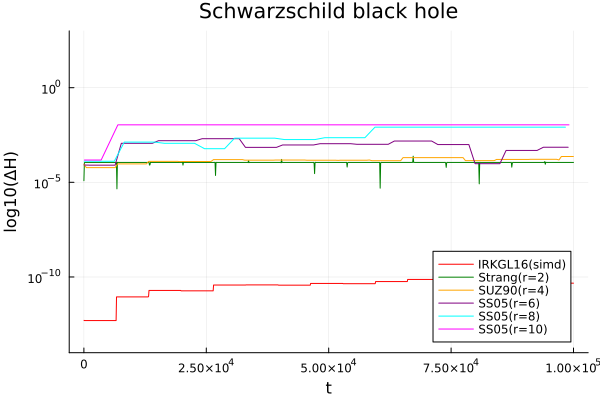

In [23]:
plot(pl3)

In [24]:
savefig("./figures/Fig1c.pdf")

"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Schwarzschild black hole/figures/Fig1c.pdf"

<a href="#top">Back to the top</a>

### Error in Solution

In [25]:
errors2plot=[sols_irk16_simd.sols[index[1]], sols_split_r2.sols[index[3]], sols_split_r4.sols[index[4]],
              sols_split_r6.sols[index[5]],   sols_split_r8.sols[index[6]], sols_split_r10.sols[index[7]]]

ddt02plot=[sols_irk16_simd.dts[index[1]], sols_split_r2.dts[index[3]], sols_split_r4.dts[index[4]],
           sols_split_r6.dts[index[5]],   sols_split_r8.dts[index[6]], sols_split_r10.dts[index[7]]]

labels2plot_er=["IRKGL16(simd)",  
              "Strang(r=2)", "SUZ90(r=4)", "SS05(r=6)", "SS05(r=8)", "SS05(r=10)"] 

colors2plot_er=[:red, :green, :orange, :purple, :cyan, :magenta];


k=1,IRKGL16(simd),[112.0, 224.0, 336.0]
k=1,IRKGL16(simd),[112.0, 224.0, 336.0]
*****************************
k=2,IRKGL16(gen),[272.0, 544.0, 816.0]
k=2,IRKGL16(gen),[272.0, 544.0, 816.0]
*****************************
k=3,Strang(r=2),[560.0, 1120.0, 1680.0]
k=3,Strang(r=2),[560.0, 1120.0, 1680.0]
*****************************
k=4,SUZ90(r=4),[2704.0, 5408.0, 8112.0]
k=4,SUZ90(r=4),[2704.0, 5408.0, 8112.0]
*****************************
k=5,SS05(r=6),[4368.0, 8736.0, 13104.0]
k=5,SS05(r=6),[4368.0, 8736.0, 13104.0]
*****************************
k=6,SS05(r=8),[7280.0, 14560.0, 21840.0]
k=6,SS05(r=8),[7280.0, 14560.0, 21840.0]
*****************************


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


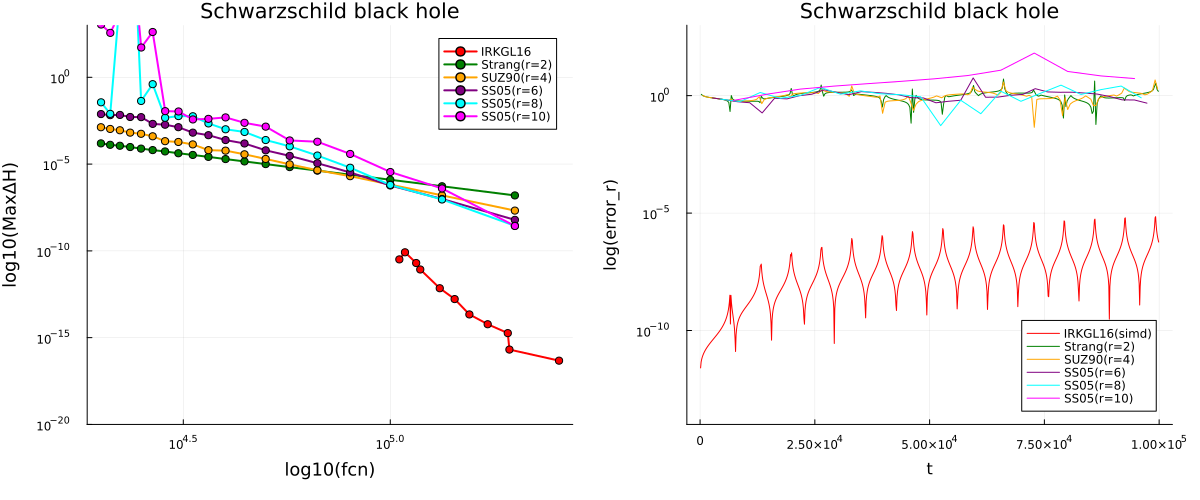

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [34]:
yrange=(1e-14, 1e3)

pe1=plot(title="Schwarzschild black hole", yscale=:log10,
         ylims=yrange,
         legend=:bottomright,
         xlabel="t", ylabel="log(error_r)")

for k in 1:length(errors2plot)
    
    w=lcm_floats_vector(vcat(ddt0_irk16[index0],ddt02plot[k]))
    ii=Int64.(w./(vcat(ddt0_irk16[index0],ddt02plot[k]))).+1
    
    v0=sols_irk16_simd.sols[index0].t[ii[1]:ii[1]-1:3*ii[1]] 
    v1=errors2plot[k].t[ii[2]:ii[2]-1:3*ii[2]]
    
    println("k=", k, ",",labels2plot[k],",", v0 )
    println("k=", k, ",",labels2plot[k],",", v1 )
    println("*****************************")
    
    error= map((u,u1)-> abs(BigFloat(u[1])/BigFloat(u1[1])-1),
                errors2plot[k].u[ii[2]:ii[2]-1:end], sols_irk16_simd.sols[index0].u[ii[1]:ii[1]-1:end])
     
    
    tt=sols_irk16_simd.sols[index0].t[ii[1]:ii[1]-1:end]
    #tt=errors2plot[k].t[ii[2]:ii[2]-1:end]
    
    plot!(pe1, tt, error,
          label=labels2plot_er[k],color=colors2plot_er[k])
    
end

fig=plot(pl3, pe1, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

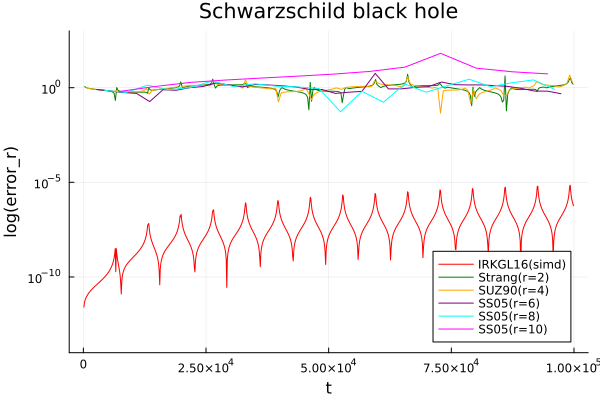

In [35]:
plot(pe1)

In [36]:
savefig("./figures/Fig1d.pdf")

"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Schwarzschild black hole/figures/Fig1d.pdf"